In [1]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2022-01-06 13:32:14--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2022-01-06 13:32:14--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2022-01-06 13:32:15--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits.shape

(300, 100, 100)

In [3]:
fruits2 = fruits.reshape(-1,10000)
fruits2.shape

(300, 10000)

In [4]:
fruits2

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [5]:
from sklearn.cluster import KMeans

# KMeans 라벨링 -> 모델 생성 -> 학습 -> 평가

# 사과, 바나나, 파인애플 분류하는 머신러닝 모델
# 사진 300장

km = KMeans(n_clusters = 3)
km.fit(fruits2)
km.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

fruits = np.load('fruits_300.npy')
fruits2 = fruits.reshape(-1,10000) / 255

km = KMeans(n_clusters = 3)
km.fit(fruits2)
target = km.labels_

train_input, test_input, train_target, test_target = train_test_split(fruits2, target, test_size = 0.2)

model = KNeighborsClassifier()
model.fit(train_input, train_target)
model.score(test_input, test_target)

0.9833333333333333

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(fruits2)

PCA(n_components=2)

In [8]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1):
    
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows<2 else 10

    fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off')
        
    plt.show()

In [9]:
a = pca.components_.reshape(-1,100,100)
len(a)

2

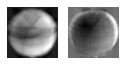

In [10]:
import matplotlib.pyplot as plt
draw_fruits(a)

In [12]:
fruits2.shape

(300, 10000)

In [13]:
fruits_pca = pca.transform(fruits2)
fruits_pca.shape

(300, 2)

In [14]:
fruits_pca

array([[-10.89575606,  -6.164211  ],
       [-12.07166138, -10.74223692],
       [-10.27690482,  -5.8308649 ],
       [-12.21065769,  -9.92165817],
       [ -9.8848904 ,  -9.13979574],
       [ -6.10485727,   0.48255552],
       [-10.63289236,  -7.28373716],
       [-11.31271701,  -7.20059947],
       [ -9.06271531, -10.43318686],
       [ -5.96575157,  -9.58970342],
       [ -9.75261348,  -5.78647229],
       [-10.98368286,  -7.84733788],
       [-11.02181368,  -7.97789503],
       [ -8.66313104,  -9.03437613],
       [-11.44073766,  -9.56245221],
       [ -8.62028194,  -2.49726216],
       [ -9.08869875, -10.60706476],
       [-12.90135938,  -9.55448408],
       [-10.36058896,   1.97548659],
       [-13.97598464,  -5.05886932],
       [-14.54370969,  -6.17778895],
       [ -9.50575003,  -8.15934678],
       [-12.42799935,  -8.77938135],
       [-11.99738986,  -8.82411372],
       [-10.76794689,  -8.92926893],
       [-12.49263888,  -3.75781707],
       [-11.65164914,  -0.98340981],
 

In [15]:
train_input, test_input, train_target, test_target = train_test_split(fruits_pca, target, test_size = 0.2)

model = KNeighborsClassifier()
model.fit(train_input, train_target)
model.score(test_input, test_target)

1.0

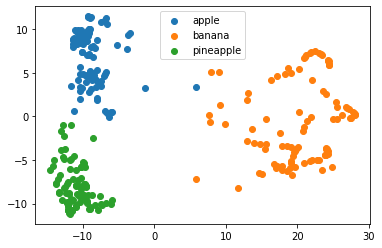

In [16]:
for i in range(0,3):
    data = fruits_pca[target == i]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()

In [17]:
target

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9) #개수
pca.fit(fruits2)

PCA(n_components=0.9)

In [19]:
len(pca.explained_variance_ratio_)

39

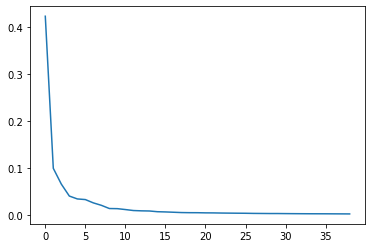

In [20]:
plt.plot(pca.explained_variance_ratio_)

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [22]:
news = datasets.fetch_20newsgroups()    # 뉴스기사 // 20개(IT, 스포츠, 정치...)
data, target = news.data, news.target

In [23]:
data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [24]:
target

array([7, 4, 4, ..., 3, 1, 8])

In [25]:
train_input, test_input, train_target, test_target = train_test_split(data, target)

vectorizer = TfidfVectorizer()

train_scaled = vectorizer.fit_transform(train_input)
test_scaled = vectorizer.transform(test_input)

In [26]:
train_scaled

<8485x104945 sparse matrix of type '<class 'numpy.float64'>'
	with 1337992 stored elements in Compressed Sparse Row format>

In [27]:
model = MultinomialNB(alpha=0.01)
model.fit(train_scaled, train_target)

MultinomialNB(alpha=0.01)

In [28]:
model.score(test_scaled, test_target)

0.9003181336161188

In [29]:
# 감성 사전

import pandas as pd

pd.read_csv('knu_sentiment_lexicon.csv')

,word,polarity
0,ㅡㅡ,-1
1,ㅠㅠ,-1
2,ㅠ_ㅠ,-1
3,ㅠ,-1
4,ㅜㅡ,-1
...,...,...
14849,(^-^),1
14850,(;_;),-1
14851,(-_-),-1
14852,(-;,1


In [31]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

news = datasets.fetch_20newsgroups()    # 뉴스기사 // 20개(IT, 스포츠, 정치...)
data, target = news.data, news.target

train_input, test_input, train_target, test_target = train_test_split(data, target)

vectorizer = TfidfVectorizer()

train_scaled = vectorizer.fit_transform(train_input)
test_scaled = vectorizer.transform(test_input)

model = MultinomialNB(alpha=0.01)
model.fit(train_scaled, train_target)

MultinomialNB(alpha=0.01)

In [32]:
model.score(test_scaled, test_target)

0.9095086603039944